In [124]:
import pandas as pd

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

načtení datasetu

In [126]:
data = pd.read_csv('Stats_survey.csv')

In [127]:
# Zobrazení prvních několika řádků dat
data.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Úprava dat

In [128]:
# Přejmenování sloupců pro lepší čitelnost
data.rename(columns={
    "Timespent": "Timespent",
    "Your Sex?": "Gender",
    "Your Matric (grade 12) Average/ GPA (in %)": "Matric_Avg",
    "What year were you in last year (2023) ?": "Year",
    "What faculty does your degree fall under?": "Faculty",
    "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)": "Yearly_Avg",
    "Your Accommodation Status Last Year (2023)": "Accommodation",
    "Monthly Allowance in 2023 (in Rs.)": "Allowance",
    "Were you on scholarship/bursary in 2023?": "Scholarship",
    "Additional amount of studying (in hrs) per week due to Stats course": "Additional_Study_Hours",
    "How often do you go out partying/socialising during the week?": "Socialising_Frequency",
    "On a night out, how many alcoholic drinks do you consume?": "Alcohol_Consumption",
    "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)": "Classes_Missed_Alcohol",
    "How many modules have you failed thus far into your studies?": "Modules_Failed",
    "Are you currently in a romantic relationship?": "Romantic_Relationship",
    "Do your parents approve alcohol consumption?": "Parents_Approve_Alcohol",
    "How strong is your relationship with your parent/s?": "Parent_Relationship",
}, inplace=True)

In [129]:
data.columns


Index(['Timestamp', 'Gender', 'Matric_Avg', 'Year', 'Faculty', 'Yearly_Avg',
       'Accommodation', 'Monthly Allowance in 2023', 'Scholarship',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'Alcohol_Consumption', 'Classes_Missed_Alcohol', 'Modules_Failed',
       'Romantic_Relationship', 'Parents_Approve_Alcohol',
       'Parent_Relationship'],
      dtype='object')

In [130]:
# Počet záznamů v datech
print(data.count())


Timestamp                                                         406
Gender                                                            404
Matric_Avg                                                        399
Year                                                              333
Faculty                                                           399
Yearly_Avg                                                        320
Accommodation                                                     383
Monthly Allowance in 2023                                         375
Scholarship                                                       398
Additional amount of studying (in hrs) per week                   403
How often do you go out partying/socialising during the week?     404
Alcohol_Consumption                                               404
Classes_Missed_Alcohol                                            403
Modules_Failed                                                    403
Romantic_Relationshi

In [131]:
# Zobrazení počtu chybějících hodnot v každém sloupci
print(data.isnull().sum())


Timestamp                                                          0
Gender                                                             2
Matric_Avg                                                         7
Year                                                              73
Faculty                                                            7
Yearly_Avg                                                        86
Accommodation                                                     23
Monthly Allowance in 2023                                         31
Scholarship                                                        8
Additional amount of studying (in hrs) per week                    3
How often do you go out partying/socialising during the week?      2
Alcohol_Consumption                                                2
Classes_Missed_Alcohol                                             3
Modules_Failed                                                     3
Romantic_Relationship             

In [132]:
# Zobrazení počtu unikátních hodnot v každém sloupci
print(data.nunique())


Timestamp                                                         400
Gender                                                              2
Matric_Avg                                                         43
Year                                                                5
Faculty                                                             8
Yearly_Avg                                                         45
Accommodation                                                       2
Monthly Allowance in 2023                                           5
Scholarship                                                         2
Additional amount of studying (in hrs) per week                     5
How often do you go out partying/socialising during the week?       6
Alcohol_Consumption                                                 5
Classes_Missed_Alcohol                                              5
Modules_Failed                                                      5
Romantic_Relationshi

In [133]:
# Zobrazeni shrnutí dat
summary = pd.DataFrame({
    "Počet_záznamů": data.count(),
    "Chybějící_hodnoty": data.isnull().sum(),
    "Unikátní_hodnoty": data.nunique()
})

print(summary)

                                                    Počet_záznamů  \
Timestamp                                                     406   
Gender                                                        404   
Matric_Avg                                                    399   
Year                                                          333   
Faculty                                                       399   
Yearly_Avg                                                    320   
Accommodation                                                 383   
Monthly Allowance in 2023                                     375   
Scholarship                                                   398   
Additional amount of studying (in hrs) per week               403   
How often do you go out partying/socialising du...            404   
Alcohol_Consumption                                           404   
Classes_Missed_Alcohol                                        403   
Modules_Failed                    

In [134]:
# Konverze sloupce "Timestamp" na datetime formát
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Timestamp                                                       406 non-null    datetime64[ns]
 1   Gender                                                          404 non-null    object        
 2   Matric_Avg                                                      399 non-null    float64       
 3   Year                                                            333 non-null    object        
 4   Faculty                                                         399 non-null    object        
 5   Yearly_Avg                                                      320 non-null    float64       
 6   Accommodation                                                   383 non-null    object    

C:\Users\gabca\AppData\Local\Temp\ipykernel_20608\3208186700.py:2: FutureWarning: Parsed string "2024/03/07 5:12:01 pm EET" included an un-recognized timezone "EET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"])
C:\Users\gabca\AppData\Local\Temp\ipykernel_20608\3208186700.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"])
C:\Users\gabca\AppData\Local\Temp\ipykernel_20608\3208186700.py:2: FutureWarning: Parsed string "2024/03/07 5:12:08 pm EET" included an un-recognized timezone "EET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without 

In [135]:
print(data["Timestamp"].head())
print(data["Timestamp"].dtype)

0   2024-03-07 17:12:01
1   2024-03-07 17:12:08
2   2024-03-07 17:12:25
3   2024-03-07 17:12:28
4   2024-03-07 17:13:00
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]


## EDA

In [136]:
# Zobrazeni základních statistických údajů o datech
data.describe()

,Timestamp,Matric_Avg,Yearly_Avg
count,406,399.000000,320.000000
mean,2024-03-08 12:03:31.975369472,77.989724,66.268469
min,2024-03-07 17:12:01,34.000000,30.000000
25%,2024-03-07 17:59:29.249999872,74.000000,60.000000
50%,2024-03-07 20:55:54,78.000000,65.000000
75%,2024-03-08 09:58:36.750000128,83.000000,73.000000
max,2024-03-16 22:30:36,99.000000,95.220000
std,NaN,7.048618,9.147906


In [137]:
# Zobrazení unikátních hodnot ve sloupci "Gender"
data["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [138]:
# Zobrazení unikátních hodnot ve sloupci "Accommodation" 
data["Accommodation"].unique()

array(['Private accommodation/ stay with family/friends', nan,
       'Non-private accommodation ie. Res'], dtype=object)

In [139]:
# Zobrazení unikátních hodnot ve sloupci "Monthly Allowance in 2023"
data["Monthly Allowance in 2023"].unique()

array(['R 4001- R 5000', 'R 7001 - R 8000', 'R 6001 - R 7000',
       'R 5001 - R 6000', nan, 'R 8000+'], dtype=object)

In [140]:
data_unique = {
    "Gender_unique": pd.Series(data["Gender"].unique()),
    "Accommodation_unique": pd.Series(data["Accommodation"].unique()),
    "Monthly_Allowance_unique": pd.Series(data["Monthly Allowance in 2023"].unique())
}

unique_df = pd.DataFrame(data_unique)
print(unique_df)

  Gender_unique                             Accommodation_unique  \
0        Female  Private accommodation/ stay with family/friends   
1          Male                                              NaN   
2           NaN                Non-private accommodation ie. Res   
3           NaN                                              NaN   
4           NaN                                              NaN   
5           NaN                                              NaN   

  Monthly_Allowance_unique  
0           R 4001- R 5000  
1          R 7001 - R 8000  
2          R 6001 - R 7000  
3          R 5001 - R 6000  
4                      NaN  
5                  R 8000+  


In [141]:
yearly_gpa = data["Yearly_Avg"]
yearly_gpa_df = pd.DataFrame(yearly_gpa)

In [142]:
list(range(0, 100, 5))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

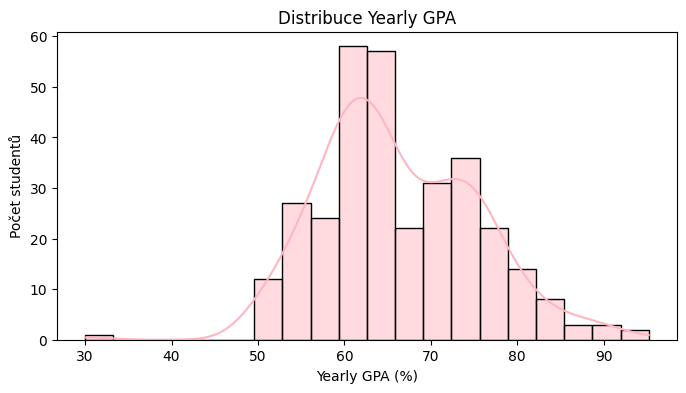

In [143]:
# Histogram distribuce Yearly GPA
plt.figure(figsize=(8,4))
sns.histplot(data["Yearly_Avg"], bins=20, kde=True, color='lightpink')
plt.title("Distribuce Yearly GPA")
plt.xlabel("Yearly GPA (%)")
plt.ylabel("Počet studentů")
plt.show()


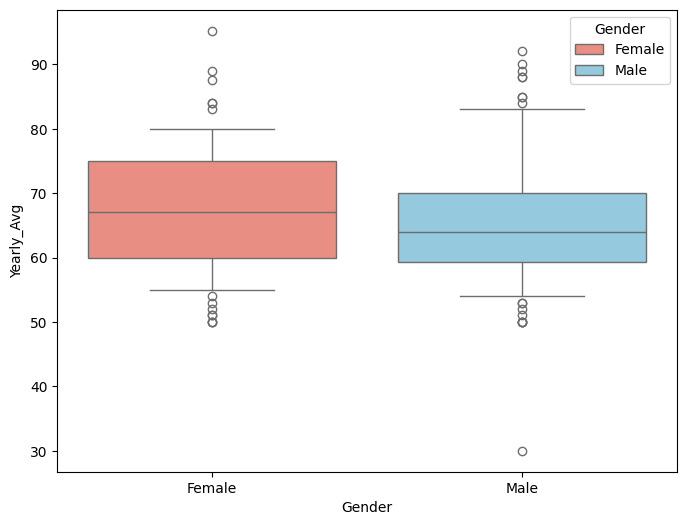

In [144]:
# Boxplot Yearly GPA podle pohlaví
plt.figure(figsize=(8,6))

ax = sns.boxplot(
    data=data, x="Gender",
    y="Yearly_Avg",
    whis=[5, 95],
    palette={"Male":"skyblue", "Female":"salmon"},
    hue="Gender")

<Axes: xlabel='Yearly_Avg'>

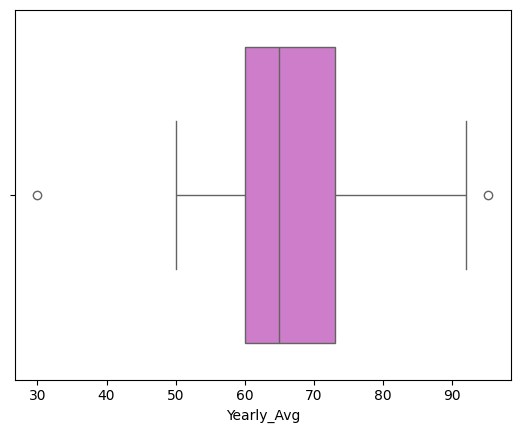

In [145]:
# Boxplot Yearly GPA
sns.boxplot(x=data["Yearly_Avg"], color="orchid")


In [146]:
# Kontingenční tabulka mezi Fakultou a Pohlavím
pivot_table = pd.crosstab(data["Faculty"], data["Gender"])

print(pivot_table)


Gender                          Female  Male
Faculty                                     
AgriSciences                         8    14
Arts & Social Sciences              31    16
Economic & Management Sciences      85   126
Education                            6     0
Engineering                         12    25
Law                                  6     4
Medicine and Health Services         8     2
Science                             27    29


### Hypotéza 1: Vliv pohlaví na akademický výkon
- H0 (nulová hypotéza): Neexistuje rozdíl v průměrném Yearly GPA mezi muži a ženami.
- H1 (alternativní hypotéza): Existuje rozdíl v průměrném Yearly GPA mezi muži a ženami.


### Hypotéza 2: Vliv konzumace alkoholu na akademický výkon
- H0 (nulová hypotéza): Konzumace alkoholu nemá vliv na akademický výkon studentů (Yearly GPA).
- H1 (alternativní hypotéza): Vyšší konzumace alkoholu je spojena s nižším akademickým výkonem studentů (Yearly GPA).


### Hypotéza 3: Vliv alkoholu na docházku
- H0: Počet zameškaných hodin kvůli alkoholu není spojen s Yearly GPA.
- H1: Vyšší počet zameškaných hodin kvůli alkoholu je spojen s nižším Yearly GPA.



### Čištění dat

In [147]:
# Odstranění záznamů s chybějícím měsíčním kapesným
data = data.dropna(subset=["Monthly Allowance in 2023"])

# Ověření počtu řádků po vyčištění
print("Počet řádků po odstranění:", len(data))

data["Monthly Allowance in 2023"].unique()


Počet řádků po odstranění: 375


array(['R 4001- R 5000', 'R 7001 - R 8000', 'R 6001 - R 7000',
       'R 5001 - R 6000', 'R 8000+'], dtype=object)

In [148]:
# Odstranění záznamů studentů Postgraduate
print(data["Year"].unique())

data = data[data["Year"] != "Postgraduate"]
# Ověření počtu řádků po vyčištění
print("Počet řádků po odstranění:", len(data))

print(data["Year"].unique())


['2nd Year' '1st Year' nan '3rd Year' '4th Year' 'Postgraduate']
Počet řádků po odstranění: 370
['2nd Year' '1st Year' nan '3rd Year' '4th Year']


In [149]:
print(data["Year"].unique())

['2nd Year' '1st Year' nan '3rd Year' '4th Year']


In [150]:
print(data["Monthly Allowance in 2023"].unique())

['R 4001- R 5000' 'R 7001 - R 8000' 'R 6001 - R 7000' 'R 5001 - R 6000'
 'R 8000+']


In [151]:
# Funkce pro konverzi hodnot měsíčního kapesného

def convert_allowance(value):
    if pd.isna(value):
        return np.nan
    
    val = str(value).strip()
    val = val.replace("R", "").replace(" ", "")  # odstraníme R a mezery
    
    # Interval typu "4001-5000"
    if "-" in val:
        parts = val.split("-")
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) // 2   # středová hodnota
        except:
            return np.nan
    
    # Hodnota typu "8000+"
    if val.endswith("+"):
        try:
            num = int(val[:-1])
            return num   # vezmeme spodní hranici
        except:
            return np.nan
    
    # Pokud je to čisté číslo
    try:
        return int(val)
    except:
        return np.nan

# Aplikace na sloupec
data["Monthly_Allowance_clean"] = data["Monthly Allowance in 2023"].apply(convert_allowance)

# Ověření
print(data[["Monthly Allowance in 2023", "Monthly_Allowance_clean"]].head())

  Monthly Allowance in 2023  Monthly_Allowance_clean
0            R 4001- R 5000                     4500
1           R 7001 - R 8000                     7500
2            R 4001- R 5000                     4500
3           R 6001 - R 7000                     6500
4            R 4001- R 5000                     4500


In [152]:
print(data["Monthly_Allowance_clean"].unique())

[4500 7500 6500 5500 8000]


### Vizualizace výsledků

C:\Users\gabca\AppData\Local\Temp\ipykernel_20608\2697388509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x="Gender", y="Yearly_Avg",


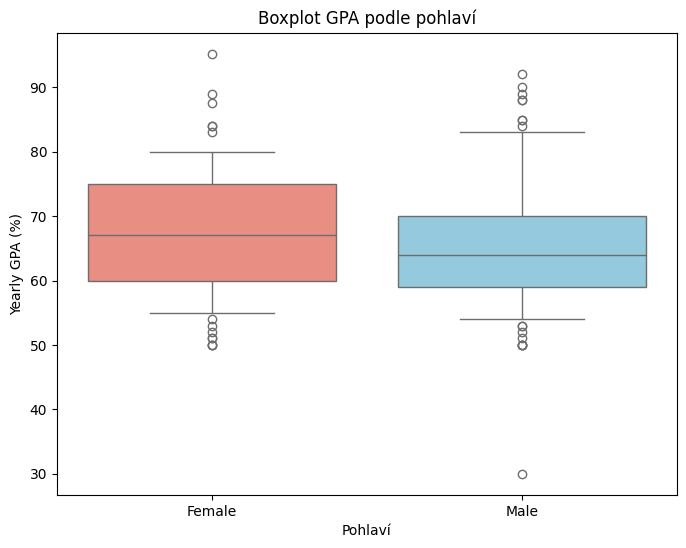

In [153]:
# Hypotéza 1: Vliv pohlaví na akademický výkon

plt.figure(figsize=(8,6))
sns.boxplot(data=data_clean, x="Gender", y="Yearly_Avg",
            palette={"Male":"skyblue","Female":"salmon"}, whis=[5,95])
plt.title("Boxplot GPA podle pohlaví")
plt.xlabel("Pohlaví")
plt.ylabel("Yearly GPA (%)")
plt.show()

#### Závěr
Rozdíly podle pohlaví nejsou výrazně, i když lze vidět, že ženy dosahují v průměru vyššího GPA.

In [ ]:
# Hypotéza 2: Vliv konzumace alkoholu na akademický výkon
# Tu vyskočí chyba, sloupec Alcohol_Consumption má NaN a textové hodnoty, stejně jako Yearly_Avg, takže je potřeba je vyčistit

print(data["Alcohol_Consumption"].unique()[:20])
print(data["Yearly_Avg"].unique()[:20])

['8+' '3-5' '5-8' '1-3' '0']
[72. 75. 55. 84. 52. nan 54. 64. 76. 65. 62. 69. 60. 74. 70. 63. 73. 57.
 90. 78.]


In [162]:
# Převedení sloupců na číselné hodnoty

def convert_alcohol(value):
    if pd.isna(value):
        return np.nan
    
    val = str(value).strip()
    
    # Interval typu "3-5"
    if "-" in val:
        parts = val.split("-")
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2   # středová hodnota
        except:
            return np.nan
    
    # Hodnota typu "8+"
    if val.endswith("+"):
        try:
            return int(val[:-1])   # vezmeme spodní hranici
        except:
            return np.nan
    
    # Pokud je to čisté číslo
    try:
        return int(val)
    except:
        return np.nan

# Aplikace na sloupec
data["Alcohol_Consumption_num"] = data["Alcohol_Consumption"].apply(convert_alcohol)

# Ověření
print(data[["Alcohol_Consumption","Alcohol_Consumption_num"]].head())

# Odstranění řádků s chybějícími hodnotami v těchto sloupcích
data = data.dropna(subset=["Alcohol_Consumption","Yearly_Avg"])


  Alcohol_Consumption  Alcohol_Consumption_num
0                  8+                      8.0
1                 3-5                      4.0
2                  8+                      8.0
3                  8+                      8.0
4                 5-8                      6.5


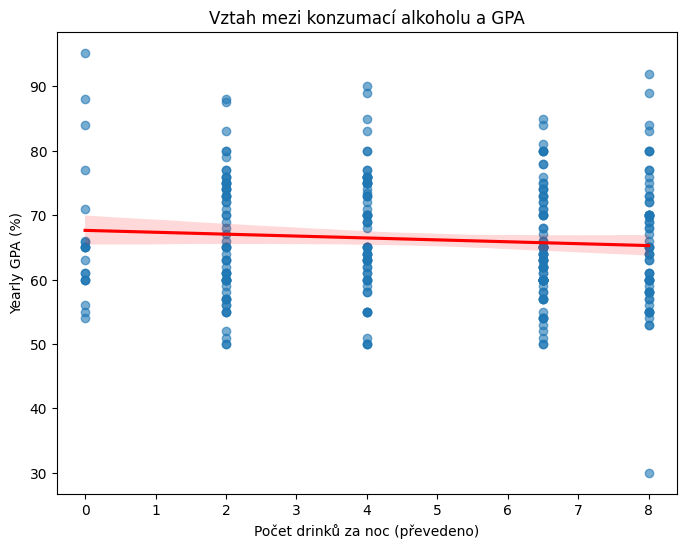

In [ ]:
# Zobrazení pomocí regrese
plt.figure(figsize=(8,6))
sns.regplot(data=data_clean, x="Alcohol_Consumption_num", y="Yearly_Avg",
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Vztah mezi konzumací alkoholu a GPA")
plt.xlabel("Počet drinků za noc (převedeno)")
plt.ylabel("Yearly GPA (%)")
plt.show()

#### Závěr
Korelace je negativní, takže více alkoholu vede k nižšímu GPA.

In [171]:
# Hypotéza 3: Vliv alkoholu na docházku
# Chyba, sloupec Classes_Missed_Alcohol má NaN hodnoty, je potřeba je vyčistit a převest na číselné hodnoty

print(data["Classes_Missed_Alcohol"].unique()[:20])

def convert_classes(value):
    if pd.isna(value):
        return np.nan
    
    val = str(value).strip()
    
    # Interval typu "1-3"
    if "-" in val:
        parts = val.split("-")
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2   # středová hodnota
        except:
            return np.nan
    
    # Hodnota typu "2+"
    if val.endswith("+"):
        try:
            return int(val[:-1])   # spodní hranice
        except:
            return np.nan
    
    # Čisté číslo
    try:
        return int(val)
    except:
        return np.nan

# Aplikace na sloupec
data["Classes_Missed_num"] = data["Classes_Missed_Alcohol"].apply(convert_classes)

# Ověření
print(data[["Classes_Missed_Alcohol","Classes_Missed_num"]].head())


['3' '4+' '2' '1' '0' nan]
  Classes_Missed_Alcohol  Classes_Missed_num
0                      3                 3.0
1                     4+                 4.0
2                      3                 3.0
3                      2                 2.0
4                      1                 1.0


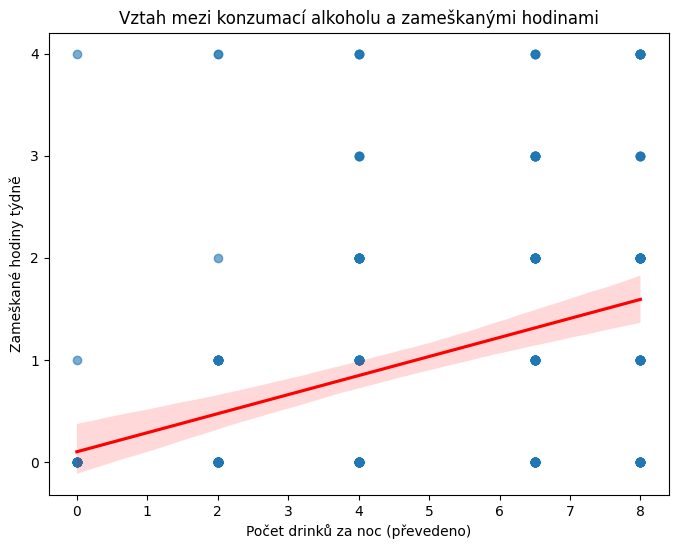

In [174]:
# Zobrazeni pomocí regrese

plt.figure(figsize=(8,6))
sns.regplot(data=data, 
            x="Alcohol_Consumption_num", 
            y="Classes_Missed_num",
            scatter_kws={"alpha":0.6}, 
            line_kws={"color":"red"})
plt.title("Vztah mezi konzumací alkoholu a zameškanými hodinami")
plt.xlabel("Počet drinků za noc (převedeno)")
plt.ylabel("Zameškané hodiny týdně")
plt.show()


#### Závěr
Zde je korelace pozitivní, takže větší konzumace alkoholu vede k více zaměškaným hodinám.